# Machine Learning Model - Tiki Book Dataset
## 1. Data preprocessing
#### Library import

In [1]:
# Basic libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sklearn tools
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Sklearn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report

# Sklearn models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


#### Dataset import

In [2]:
# Import the dataset
df = pd.read_csv("../Data/Tiki_product_data_20230620.csv")
df.head()

,id,name,existed_day_count,price_kvnd,list_price_kvnd,original_price_kvnd,discount_kvnd,discount_rate,rating_average,review_count,quantity_sold_count,seller_count,category
0,53434797,Sách Tài Chính Cá Nhân Cho Người Việt Nam - Tặ...,1147,184.0,200.0,200.0,16.0,8,4.7,1754,13092,2,"Sách tài chính, tiền tệ"
1,75953557,Tâm Lý Học Về Tiền,888,110.0,189.0,189.0,79.0,42,4.8,3365,22842,17,"Sách tài chính, tiền tệ"
2,126853168,Thấu hiểu Hành vi giá Thị trường Tài chính (Un...,627,367.0,367.0,367.0,0.0,0,5.0,248,1459,2,"Sách tài chính, tiền tệ"
3,146223395,Cách thức kinh doanh và đầu cơ cổ phiếu! – How...,561,349.0,349.0,349.0,0.0,0,4.8,762,3824,1,"Sách tài chính, tiền tệ"
4,53532186,Tuyệt kỹ Giao dịch bằng đồ thị nến Nhật – Japa...,1146,499.0,499.0,499.0,0.0,0,4.8,2263,12664,1,"Sách tài chính, tiền tệ"


#### Data overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14399 entries, 0 to 14398
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14399 non-null  int64  
 1   name                 14399 non-null  object 
 2   existed_day_count    14399 non-null  int64  
 3   price_kvnd           14399 non-null  float64
 4   list_price_kvnd      14399 non-null  float64
 5   original_price_kvnd  14399 non-null  float64
 6   discount_kvnd        14399 non-null  float64
 7   discount_rate        14399 non-null  int64  
 8   rating_average       14399 non-null  float64
 9   review_count         14399 non-null  int64  
 10  quantity_sold_count  14399 non-null  int64  
 11  seller_count         14399 non-null  int64  
 12  category             14399 non-null  object 
dtypes: float64(5), int64(6), object(2)
memory usage: 1.4+ MB


#### Book name cleaning

In [4]:
# Function to clean the word of any punctuation or special characters
def cleanpunc(sentence): 
    cleaned = re.sub(r'[^\w|.]',r' ',sentence)
    return  cleaned

# Clean the name field
df['name_clean'] = df['name'].str.lower()
df['name_clean'] = df['name_clean'].apply(cleanpunc)
df['name_clean']

0        sách tài chính cá nhân cho người việt nam   tặ...
1                                       tâm lý học về tiền
2        thấu hiểu hành vi giá thị trường tài chính  un...
3        cách thức kinh doanh và đầu cơ cổ phiếu    how...
4        tuyệt kỹ giao dịch bằng đồ thị nến nhật   japa...
                               ...                        
14394         top những cuốn sách hot nhất về bất động sản
14395                      cuốn sách  tinh anh công sở 4.0
14396    combo 2 cuốn sách gối đầu để thành công trong ...
14397                  thông minh hơn  nhanh hơn  giỏi hơn
14398                        trong chớp mắt  tái bản 2015 
Name: name_clean, Length: 14399, dtype: object

#### Category numerization

In [5]:
# Numerize the category field
LE = LabelEncoder()
df['category_id'] = LE.fit_transform(df['category'])
df.groupby(['category_id'])['category'].value_counts()

category_id  category                 
0            Bài học kinh doanh           1989
1            Sách Marketing - Bán hàng    1996
2            Sách doanh nhân              1061
3            Sách khởi nghiệp             1165
4            Sách kinh tế học             1641
5            Sách kỹ năng làm việc        1991
6            Sách quản trị nhân lực        412
7            Sách quản trị, lãnh đạo      1986
8            Sách tài chính, kế toán       323
9            Sách tài chính, tiền tệ      1835
Name: count, dtype: int64

## 2. Price Prediction
* Base on the numeric non-currency fields, I will build the Linear Regression model to predict the price of the product.
#### Feature Selection and Data Splitting

In [6]:
# Feature selection
x_lr = df.drop(['id', 'name', 'price_kvnd', 'original_price_kvnd', 
                'discount_kvnd', 'discount_rate', 'category', 'name_clean'], axis = 1)
y_lr = df['price_kvnd']

# Split the dataset
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x_lr, y_lr, random_state = 22)

#### Input Data Rescaling 

In [7]:
# Rescale the input data
scaler = StandardScaler()

x_train_lr_rescale = pd.DataFrame(scaler.fit_transform(x_train_lr), columns = x_train_lr.columns)
x_test_lr_rescale = pd.DataFrame(scaler.fit_transform(x_test_lr), columns = x_test_lr.columns)

#### Model Training

In [8]:
# Setup the model
lr = LinearRegression()

# Run the model on train dataset
model_lr = lr.fit(x_train_lr_rescale, y_train_lr)
yhat_train_lr = model_lr.predict(x_train_lr_rescale)

# Show the report
print('Report of the training LR model')
print('Mean absolute error: ', mean_absolute_error(y_train_lr, yhat_train_lr))
print('Percentage of mean absolute error:', mean_absolute_error(y_train_lr, yhat_train_lr) / np.mean(yhat_train_lr) * 100)
print('Mean squared error:', mean_squared_error(y_train_lr, yhat_train_lr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_train_lr, yhat_train_lr)))

Report of the training LR model
Mean absolute error:  19.731920605880493
Percentage of mean absolute error: 10.550009072329221
Mean squared error: 1254.1927887984
Root mean squared error: 35.414584408099444


#### Model Testing

In [9]:
# Run the model on test dataset
yhat_test_lr = model_lr.predict(x_test_lr_rescale)

# Show the report
print('Report of the testing LR model')
print('Mean absolute error:', mean_absolute_error(y_test_lr, yhat_test_lr))
print('Percentage of mean absolute error:', mean_absolute_error(y_test_lr, yhat_test_lr) / np.mean(yhat_test_lr) * 100)
print('Mean squared error:', mean_squared_error(y_test_lr, yhat_test_lr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test_lr, yhat_test_lr)))


Report of the testing LR model
Mean absolute error: 25.062878886035257
Percentage of mean absolute error: 13.400297158481377
Mean squared error: 1814.6743794467677
Root mean squared error: 42.59899505207567


#### Test Result Visualization

Text(0, 0.5, 'Difference from the real price (x 1000 VND)')

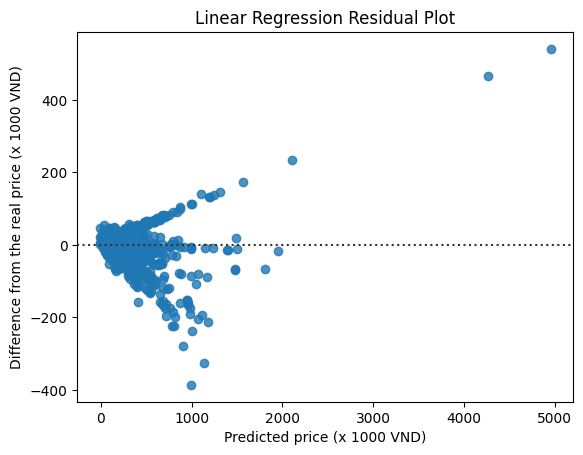

In [10]:
sns.residplot(x = yhat_test_lr, y = y_test_lr)
plt.title('Linear Regression Residual Plot')
plt.xlabel('Predicted price (x 1000 VND)')
plt.ylabel('Difference from the real price (x 1000 VND)')

#### Conclusion
* Overall, the predicted prices are 13.4% higher or lowers the real ones.
* The residual plot shows that the higher the real price, the higher the difference.
## 3. Category Classification
* I want to see if I can classify the product base on its name. Thus, I build the Random Forest Classification model for this task.
#### Feature Selection and Data Splitting

In [11]:
# Number of words in book name
NUMBER_OF_COMPONENTS = 500

# Convert book name to matrix
vectorizer = TfidfVectorizer(lowercase = True, analyzer='word', ngram_range = (1, 2), 
                             min_df = 0.005, max_df = 0.9)
svd_truncer = TruncatedSVD(n_components = NUMBER_OF_COMPONENTS)

# Feature selection
name_mat = vectorizer.fit_transform(df['name_clean'])
x_rfc = svd_truncer.fit_transform(name_mat)
y_rfc = df['category_id']

# Split the dataset
x_train_rfc, x_test_rfc, y_train_rfc, y_test_rfc = train_test_split(x_rfc, y_rfc, random_state = 22)

#### Model Training

In [12]:
# Setup the model
rfc = RandomForestClassifier(random_state = 22, max_depth = 8, n_estimators = 100)

# Run the model on train dataset
model_rfc = rfc.fit(x_train_rfc, y_train_rfc) 
yhat_train_rfc = model_rfc.predict(x_train_rfc)

# Show the report
print('Report of the training RFC model')
print(classification_report(y_train_rfc.values, yhat_train_rfc))

Report of the training RFC model
              precision    recall  f1-score   support

           0       0.46      0.73      0.57      1505
           1       0.75      0.79      0.77      1498
           2       0.95      0.07      0.13       777
           3       0.89      0.37      0.52       871
           4       0.83      0.42      0.56      1234
           5       0.45      0.72      0.55      1516
           6       0.97      0.29      0.44       329
           7       0.68      0.76      0.72      1465
           8       0.96      0.39      0.56       248
           9       0.71      0.81      0.76      1356

    accuracy                           0.62     10799
   macro avg       0.77      0.54      0.56     10799
weighted avg       0.70      0.62      0.60     10799



#### Model Testing

In [13]:
# Run the model on test dataset
yhat_test_rfc = model_rfc.predict(x_test_rfc)

# Show the report
print('Report of the testing RFC model')
print(classification_report(y_test_rfc.values, yhat_test_rfc))

Report of the testing RFC model
              precision    recall  f1-score   support

           0       0.34      0.55      0.42       484
           1       0.68      0.73      0.71       498
           2       0.88      0.05      0.10       284
           3       0.88      0.36      0.51       294
           4       0.71      0.29      0.41       407
           5       0.33      0.57      0.42       475
           6       0.88      0.18      0.30        83
           7       0.60      0.64      0.62       521
           8       0.92      0.48      0.63        75
           9       0.62      0.70      0.66       479

    accuracy                           0.52      3600
   macro avg       0.68      0.46      0.48      3600
weighted avg       0.61      0.52      0.50      3600



#### Conclusion
* The model work best for category 3 and 8 (high precision and acceptable F1 score). Category 0 and 5 have the most unreliable predictions.
* Since the Tiki product name is not consistent with no particular structure, more manual preprocessing works are required for better model.
## 4. Popularity clustering
* I try to classify the popularity of each product, which is not labeled in the dataset. Therefore, an unsupervised K-mean Clustering model is applied in here.
#### Fearture Selection and Rescaling

In [14]:
# Feature selection
x_cl = df[['existed_day_count', 'rating_average', 'review_count', 'quantity_sold_count', 'seller_count']]

# Rescale the input data
scaler = StandardScaler()

x_cl_rescale = pd.DataFrame(scaler.fit_transform(x_cl), columns = x_cl.columns)


#### K-mean number selection

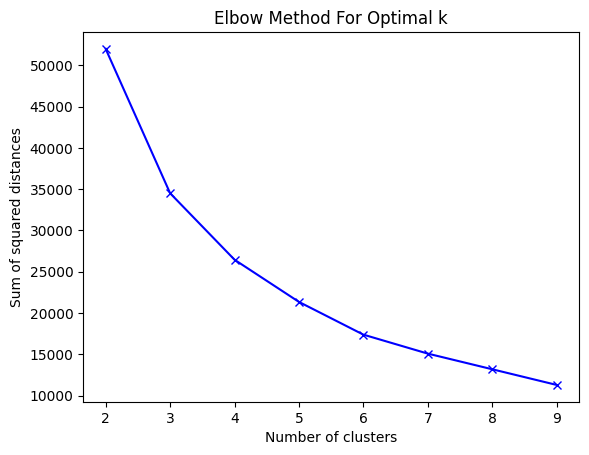

In [15]:
# Find the best number of clusters
sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters = k, max_iter = 600, n_init = 10)
   km.fit(x_cl_rescale)
   sum_of_squared_distances.append(km.inertia_)

# Plot the result
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

* Since the scope change significantly from 3 to 4 clusters, the optimal value here is 3.
#### Model Building

In [16]:
# Get clusters
true_km = 3
model_km = KMeans(n_clusters = true_km, init = 'k-means++', max_iter = 600, n_init = 10)
model_km.fit(x_cl_rescale)

# Get prediction/ labels
labels = model_km.labels_
book_popular = pd.DataFrame(list(zip(labels, df['name'], df['existed_day_count'], df['rating_average'], df['review_count'], 
                                     df['quantity_sold_count'], df['seller_count'])), 
                            columns = ['cluster', 'name','existed_day_count', 'rating_average', 'review_count', 
                                       'quantity_sold_count', 'seller_count'])
print(book_popular.sort_values(by = ['cluster']))

       cluster                                               name  \
7199         0          Sách - Content và Nghệ thuật Storytelling   
9107         0  Quan hệ pháp lý giữa Nhà nước và doanh nghiệp ...   
9109         0  Đầu Tư Dễ Ợt - Sách Chứng Khoán Của Người Việt...   
9111         0         Kinh Doanh Dựa Trên Thành Viên - Bản Quyền   
9112         0  Những đế chế công nghệ số (How they started di...   
...        ...                                                ...   
8577         2  Dịch Vụ Logistics Ở Việt Nam Trong Tiến Trình ...   
8576         2                          Tương Lai Thuộc Về Châu Á   
8575         2  Designa -  Những bí quyết kỹ thuật của nghệ th...   
8589         2  Quản trị liên văn hóa với đóng góp của ngành K...   
10228        2          Làm Chủ Tư Duy, Thay Đổi Vận Mệnh ( 2019)   

       existed_day_count  rating_average  review_count  quantity_sold_count  \
7199                 496             0.0             0                    2   
9107         

#### Resulting Visualization

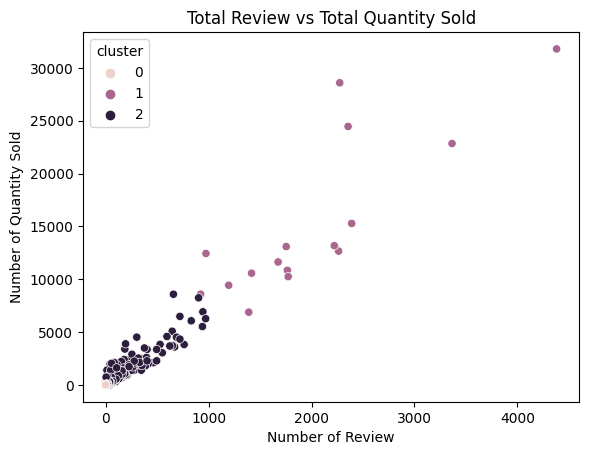

In [17]:
# Show the result
sns.scatterplot(data = book_popular, x = 'review_count', y = 'quantity_sold_count', hue = 'cluster')
plt.xlabel('Number of Review')
plt.ylabel('Number of Quantity Sold')
plt.title('Total Review vs Total Quantity Sold')
plt.show()

#### Conclusion
* The model follow mainly the relationship between the total review and total quantity sold.
* Cluster 1 stands for the most popular products, while cluster 2 are the least ones.